<a href="https://colab.research.google.com/github/Sohaibsul/AI-ML-INTERNSHIP-/blob/main/Predict_Future_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# **Download Stock Data**

In [2]:
# Download Apple stock data
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

# Show first few rows
data.head()


/tmp/ipython-input-2-671903013.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421257,126.136090,123.164587,125.504275,80962700
2023-01-06,127.962395,128.623825,123.292887,124.398567,87754700
2023-01-09,128.485641,131.703962,128.228972,128.801557,70790800


# Data Preparation

In [3]:
# Shift the 'Close' column to create a target: next day's closing price
data['Target'] = data['Close'].shift(-1)

# Drop the last row (since it has NaN in Target)
data = data.dropna()

# Features and labels
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training**

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Predictions and Evaluation**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1️⃣ Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))

# Fixed RMSE computation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R² Score: 0.9852468359856823
RMSE: 2.0712879022963286


# **visualization**

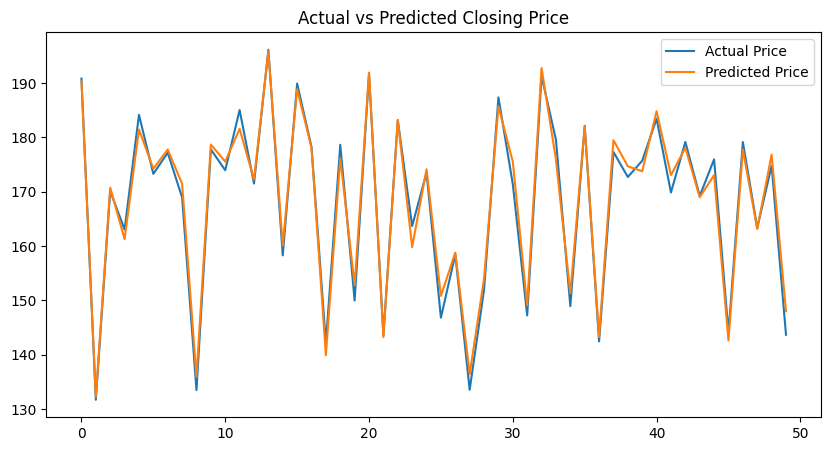

In [11]:
# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("Actual vs Predicted Closing Price")
plt.legend()
plt.show()